In [13]:
import PIL.Image as img
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import os.path
import glob
from xlwt import *

In [14]:
from xlrd import *

In [15]:
wb = open_workbook('/home/jiarui/git/Deeplab_KITTI/inconsistency/data.xlsx')

In [ ]:
sh = wb.sheet_by_index(0)

In [23]:
name = sh.col_values(0,1)

In [24]:
re_pre = sh.col_values(5,1)

In [25]:
pre_gt = sh.col_values(6,1)

In [27]:
np.arange(len(name))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

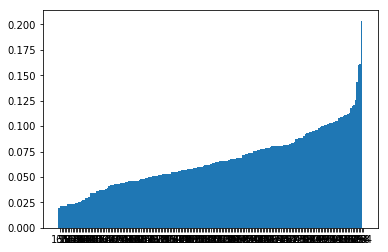

In [32]:
num = len(name)
bar_width = 1
index = np.arange(num)
plt.figure()
plt.bar(index, sorted(re_pre), bar_width)
plt.xticks(index+bar_width, np.argsort(re_pre))
plt.show()

In [41]:
ind_sort = np.argsort(re_pre)
ind_show = ind_sort[::10]
index_show = index[::10]
index_show

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190])

In [35]:
re_pre_sort = []
for i in np.argsort(pre_gt):
    re_pre_sort.append(re_pre[i])
re_pre_sort

[0.025013422818791948,
 0.021814317673378075,
 0.024984340044742728,
 0.023532438478747204,
 0.019407158836689038,
 0.028888143176733782,
 0.023498881431767336,
 0.05247203579418345,
 0.03399552572706935,
 0.02327069351230425,
 0.034172259507829976,
 0.023201342281879193,
 0.029422818791946307,
 0.0306420581655481,
 0.0372841163310962,
 0.04598434004474273,
 0.04275167785234899,
 0.050315436241610736,
 0.023333333333333334,
 0.05250111856823266,
 0.02166890380313199,
 0.04256599552572707,
 0.04305369127516778,
 0.036845637583892615,
 0.046384787472035796,
 0.03714093959731544,
 0.05863758389261745,
 0.060049217002237136,
 0.05689709172259508,
 0.06480536912751678,
 0.06144519015659955,
 0.04092393736017897,
 0.08868456375838926,
 0.03652348993288591,
 0.052751677852348994,
 0.04794407158836689,
 0.04364653243847875,
 0.06174049217002237,
 0.0492930648769575,
 0.0443758389261745,
 0.046420581655480984,
 0.06421476510067115,
 0.02138702460850112,
 0.10316107382550335,
 0.0615234899328859

In [39]:
np.argsort(pre_gt)

array([ 85, 184, 134, 136, 135, 138, 139, 131, 140, 133, 185, 137, 183,
       132,  76,  60,  75,  19, 161,  87,   6, 165,  64,  86, 141,  70,
       166,  10,   8,  11,  12,   7,  30, 157,  71, 167, 159, 172, 146,
        72,   0, 150,   5, 149, 194,  18,  45,  17, 160,  52, 109, 122,
        41, 144, 170, 181,  47, 186, 180,  61, 190, 110,  48,  15,  50,
        53,  51,  35, 113, 187,  28, 117,  62, 106,   9, 171, 116, 182,
        46,  77,  69, 105, 112, 107, 114,   4,  73,  27,  14, 155,  68,
        43,  90,  16,  74,  44,  13,  79, 115,  42,  81,  40,  22, 120,
       123,  82, 151, 188, 143, 129, 108,  78,  95,  91, 158,  23,  99,
        84,  33,  59, 156, 189,  93, 101,  37,  36, 142,   2,  92,  94,
        49, 163, 173,  96,  80,  26,  89,  67, 100,  39,  97, 147,  65,
        20, 162,  24, 199, 178, 153, 103,  38, 130,   3,  88, 128,   1,
       168, 119, 124, 175,  31, 111,  29, 152, 195, 148, 126, 102,  21,
       192,  32, 177, 174,  98, 127,  25, 176, 193,  63,  58, 19